In [1]:
# Este comando descarga el repositorio entero a una carpeta llamada 'TFMDS' en Colab.
#!git clone https://github.com/jmorala/TFMDS.git

# Inicializar directorios
Clonar repositorio github
Posicionarse en el directorio raíz

In [1]:
import os

# Detectar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Configurar el directorio de trabajo según el entorno
if IN_COLAB:
    os.chdir('TFMDS')
else:
    # En VS Code local, nos movemos al directorio raíz del proyecto
    # Usa raw string para evitar errores de escape en rutas Windows
    current_dir = r'C:\Users\jmora\Documents\TFMDS'
    os.chdir(current_dir)

# OPCIONAL: Para verificar que estás en la ruta correcta y ver las carpetas
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\Users\jmora\Documents\TFMDS


# Análisis Descriptivo y Estadístico

En una prinera fase se realizan estadísticas resumidas para comprender la distribución y dispersión de los valores sin estructura temporal.
Después se realiza la Visualización y Análisis Específico de Series Temporales


## Lectura de fichero y adaptación de los tipos


In [2]:
import pandas as pd

# Ruta relativa del archivo CSV
RUTA_DATOS = 'datos/STDatosVentasTienda.csv'

# Cargar el archivo en un DataFrame de Pandas
dfSTventas = pd.read_csv(RUTA_DATOS, sep=';',
    parse_dates=['idSecuencia'])  

# Convertir la columna anio_mes a período mensual
dfSTventas['anio_mes'] = pd.to_datetime(dfSTventas['anio_mes']).dt.to_period('M')

# Muestra las primeras filas y la información de las columnas para iniciar la exploración
print("Primeras filas del DataFrame:")
print(dfSTventas.head())

print("\nInformación de las columnas y tipos de datos:")
dfSTventas.info()

Primeras filas del DataFrame:
  idSecuencia  producto  udsVenta  bolPromocion  bolOpen  bolHoliday  \
0  2022-11-06         1         0             1        0           1   
1  2022-11-07         1        12             1        1           0   
2  2022-11-08         1        28             1        1           0   
3  2022-11-09         1        14             1        1           0   
4  2022-11-10         1        26             1        1           0   

   udsStock  rotura_stock anio_mes  
0       148         False  2022-11  
1       148         False  2022-11  
2       136         False  2022-11  
3       306         False  2022-11  
4       291         False  2022-11  

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653514 entries, 0 to 653513
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   idSecuencia   653514 non-null  datetime64[ns]
 1   

## Análisis descriptivo

### Análisis de unidades de venta de todos los productos por días

count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64


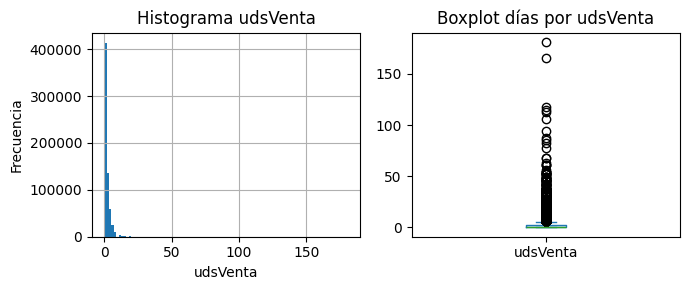

<Axes: xlabel='idSecuencia', ylabel='udsVenta'>

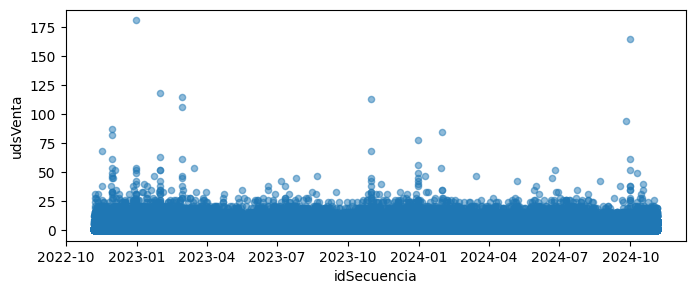

In [31]:
import matplotlib.pyplot as plt

print(dfSTventas.udsVenta.describe())

# Crear tabla de frecuencia de los valores de udsVenta para imprime
""" value_counts = dfSTventas.udsVenta.value_counts().sort_index()
print("\nTabla de frecuencia de udsVenta por día:")
print(value_counts) """

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Histograma
dfSTventas.udsVenta.hist(bins=100, ax=axes[0])
axes[0].set_title('Histograma udsVenta')
axes[0].set_xlabel('udsVenta')
axes[0].set_ylabel('Frecuencia')

# Boxplot
dfSTventas.udsVenta.plot.box(ax=axes[1])
axes[1].set_title('Boxplot días por udsVenta')

plt.tight_layout()
plt.show()

# Ventas 
dfSTventas.plot(kind='scatter', x='idSecuencia', y='udsVenta', alpha=0.5, figsize=(8, 3))

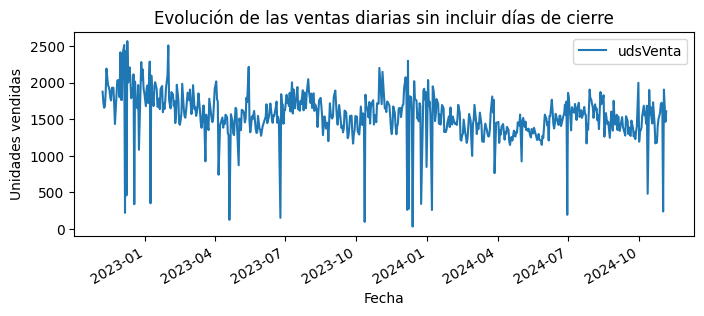

In [26]:
# Gráfico de la suma de ventas diarias, evolución cronológica
dfSTventasPorDia = dfSTventas.groupby('idSecuencia').agg({'udsVenta': 'sum', 'bolOpen': 'sum'}).reset_index()
dfSTventasPorDia[dfSTventasPorDia['bolOpen'] != 0].plot(x='idSecuencia', y='udsVenta', figsize=(8, 3))
plt.title('Evolución de las ventas diarias sin incluir días de cierre')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()

In [28]:
# Mostrar los días con menos ventas, sin contar los días cerrados
dfSTventasPorDia[dfSTventasPorDia['bolOpen'] != 0].nsmallest(10, 'udsVenta')

,idSecuencia,udsVenta,bolOpen
402,2023-12-13,33,894
340,2023-10-12,97,894
165,2023-04-20,125,894
231,2023-06-25,152,894
602,2024-06-30,194,894
30,2022-12-06,220,894
726,2024-11-01,239,894
427,2024-01-07,259,894
395,2023-12-06,261,894
397,2023-12-08,278,894


Revisión valores atípicos

In [4]:
# Revisar las filas con los diez valores máximos de udsVenta
print("\nFilas con los diez valores máximos de udsVenta:")
print(dfSTventas.nlargest(10, 'udsVenta'))


Filas con los diez valores máximos de udsVenta:
       idSecuencia  producto  udsVenta  bolPromocion  bolOpen  bolHoliday  \
435000  2022-12-31       669       181             0        1           0   
435639  2024-09-30       669       165             0        1           0   
435031  2023-01-31       669       118             0        1           0   
435059  2023-02-28       669       115             0        1           0   
435304  2023-10-31       669       113             0        1           0   
152162  2023-02-28       228       106             0        1           0   
520430  2024-09-25       800        94             0        1           0   
434969  2022-11-30       669        87             0        1           0   
233640  2024-01-31       358        85             0        1           0   
152072  2022-11-30       228        82             0        1           0   

        udsStock  rotura_stock anio_mes  
435000        49         False  2022-12  
435639        96   

Hay dos valores atípicos que resaltan más..... Pero son del mismo producto, puede que sea lógico..

### Análisis de unidades de venta por producto

In [5]:
# Número de productos únicos
dfSTventasPorProducto = dfSTventas.groupby('producto')['udsVenta'].sum().sort_values(ascending=False).reset_index()
# describe dfSTventasPorProducto
print("\nDescripción de unidades vendidas por producto:")
print(dfSTventasPorProducto.describe())


Descripción de unidades vendidas por producto:
          producto     udsVenta
count   894.000000   894.000000
mean    502.115213  1078.806488
std     291.391762   760.800367
min       1.000000   104.000000
25%     247.250000   593.000000
50%     506.500000   871.500000
75%     753.750000  1334.000000
max    1000.000000  6398.000000


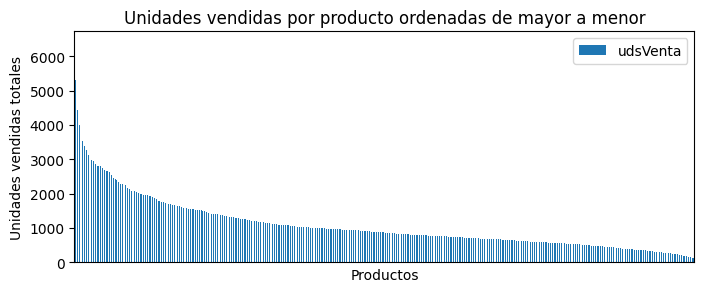

In [15]:
# gráfico de ventas totales por producto
dfSTventasPorProducto.plot(x='producto', y='udsVenta',kind='bar', figsize=(8, 3))
plt.title('Unidades vendidas por producto ordenadas de mayor a menor')
plt.xticks([])
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas totales')
plt.show()

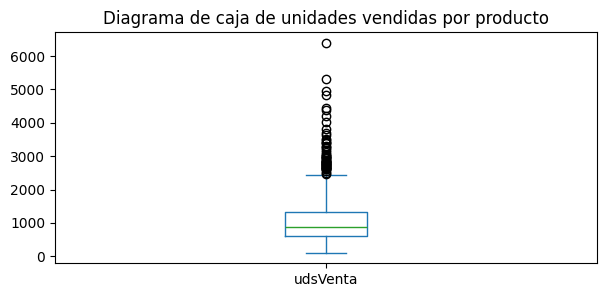

In [ ]:
# Box plot tipo violin de unidades vendidas por producto

dfSTventasPorProducto.udsVenta.plot.box(figsize=(7, 3))
plt.title('Diagrama de caja de unidades vendidas por producto')
plt.show()


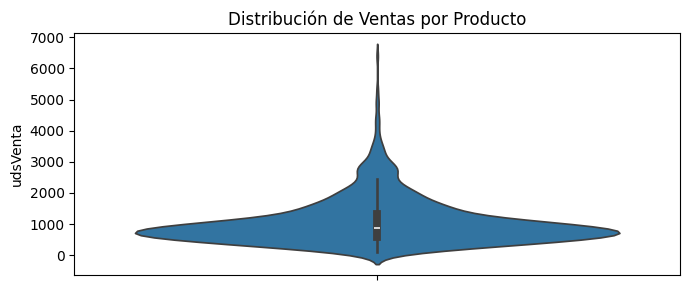

In [12]:
import seaborn as sns
plt.figure(figsize=(7, 3))
sns.violinplot(
    data=dfSTventasPorProducto.udsVenta, 
    inner='box',         # Mostrar boxplot dentro: 'box', 'quartile', 'point', None
    density_norm='width'        # 'width', 'area', 'count'
)
plt.xticks(rotation=45)
plt.title('Distribución de Ventas por Producto')
plt.tight_layout()
plt.show()

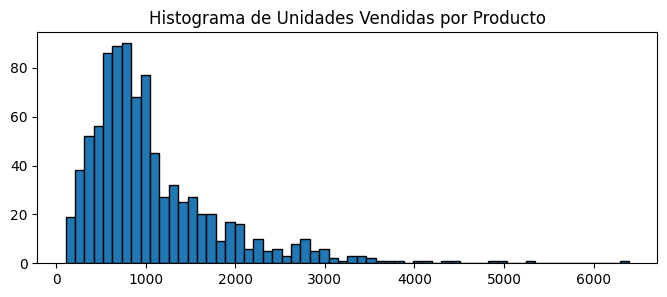

In [17]:
# historgrama de unidades vendidas por producto
plt.figure(figsize=(8, 3))
plt.hist(dfSTventasPorProducto.udsVenta, bins=60, edgecolor='black')
plt.title('Histograma de Unidades Vendidas por Producto')
plt.show()


In [29]:
# Listar los productos con más ventas
dfSTventasPorProducto.nlargest(10, 'udsVenta')

,producto,udsVenta
0,1,6398
1,2,5318
2,9,4941
3,78,4833
4,13,4432
5,7,4377
6,15,4193
7,391,4010
8,3,3810
9,150,3692


In [34]:
# Crear N clusters de productos según sus ventas totales
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(dfSTventasPorProducto[['udsVenta']])
dfSTventasPorProducto['Cluster'] = kmeans.labels_
print("\nProductos agrupados por clusters según sus ventas totales:")
print(dfSTventasPorProducto.sort_values('Cluster'))



Productos agrupados por clusters según sus ventas totales:
     producto  udsVenta  Cluster
318       290      1054        0
317       462      1056        0
316       425      1057        0
315       669      1057        0
314       172      1057        0
..        ...       ...      ...
434       309       889        3
433       547       889        3
432       995       891        3
431       867       891        3
430       796       891        3

[894 rows x 3 columns]
